Matplotlib is building the font cache; this may take a moment.


📊 Logistic Regression (Default Threshold 0.5)
Accuracy: 0.9345291479820628
Precision: 0.9873417721518988
Recall: 0.52
F1 Score: 0.6812227074235808

📊 Logistic Regression (Custom Threshold 0.3)
Accuracy: 0.9632286995515695
Precision: 0.9739130434782609
Recall: 0.7466666666666667
F1 Score: 0.8452830188679246


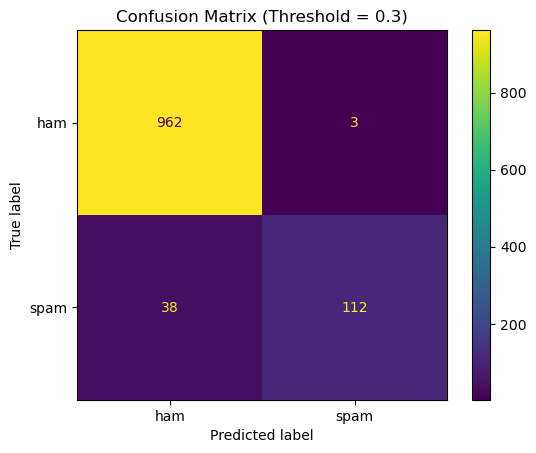

In [7]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv(r"C:\Users\Ammir Khan Khushik\Desktop\Internship Intellience\Tasks\Task1\spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Clean the message text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['clean_message'] = df['message'].apply(clean_text)

# Encode labels: 'spam' -> 1, 'ham' -> 0
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])

# TF-IDF Vectorization (with bigrams)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(df['clean_message'])
y = df['label_num']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict with default threshold
y_pred = model.predict(X_test)

# Evaluate with default threshold
print("📊 Logistic Regression (Default Threshold 0.5)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Predict with custom threshold (to improve recall)
y_proba = model.predict_proba(X_test)[:, 1]
custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate with custom threshold
print("\n📊 Logistic Regression (Custom Threshold 0.3)")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1 Score:", f1_score(y_test, y_pred_custom))

# Confusion Matrix for custom threshold
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title(f'Confusion Matrix (Threshold = {custom_threshold})')
plt.show()

In [8]:
import joblib

# Save model
joblib.dump(model, "spam_model.pkl")

# Save vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# Save threshold
joblib.dump(0.3, "best_threshold.pkl")  # since you used 0.3


['best_threshold.pkl']